# Basic Regression Workflow with Linear Regression

## Introduction

This notebook introduces the **fundamental machine learning workflow** for regression tasks using the simplest algorithm: **Linear Regression**. Our goal is to understand each step thoroughly before adding more complexity.

### What is Regression?

Regression is a supervised learning task where we predict a **continuous numerical value** (not discrete categories). Examples:
- Predicting house prices based on features
- Forecasting temperature or energy consumption
- Estimating patient recovery time

### The Complete ML Workflow

Every machine learning project follows these essential steps:

1. **Load and explore data**: Understand what we're working with
2. **Split data**: Separate training and testing sets
3. **Preprocess data**: Scale features for better performance
4. **Train model**: Fit the algorithm to training data
5. **Evaluate model**: Assess performance on test data
6. **Analyze results**: Understand predictions and errors


### Dataset: California Housing

We'll use the **California Housing dataset**:
- **20,640 observations** from 1990 California census
- **8 features**: median income, house age, rooms, location, etc.
- **Target**: Median house value (in $100,000s)

## 1. Import Required Libraries

We'll import only what we need for this basic workflow.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    r2_score
)

## 2. Load and Explore the Dataset

### Dataset Features

The California Housing dataset contains these 8 features:

1. **MedInc**: Median income in block group (in $10,000s)
2. **HouseAge**: Median house age in block group (years)
3. **AveRooms**: Average number of rooms per household
4. **AveBedrms**: Average number of bedrooms per household
5. **Population**: Block group population
6. **AveOccup**: Average household size (persons per household)
7. **Latitude**: Block group latitude
8. **Longitude**: Block group longitude

**Target**: Median house value (in $100,000s)

### Load the Dataset

The `fetch_california_housing()` function loads the dataset. By setting `as_frame=True`, we get pandas DataFrames instead of NumPy arrays.

In [40]:
# Load the California Housing dataset
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame
X = housing_data.data  # Features
y = housing_data.target  # Target (house values)

print(f"Shape: {X.shape[0]:,} observations, {X.shape[1]} features")

Shape: 20,640 observations, 8 features


### Examine the First Rows

Let's look at the first few observations to understand the data structure.

In [41]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Statistical Summary

The `describe()` method shows key statistics: mean, standard deviation, min, quartiles, and max values for each feature.

In [42]:
df.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


### Key Observations

**Notice the different scales**:
- `MedInc` ranges from ~0.5 to 15
- `Population` ranges from 3 to 35,000+
- `Latitude` ranges from 32 to 42

These vastly different scales will require **feature scaling** before training.

### Target Variable Distribution

Let's examine the target variable (house prices) more carefully.

In [43]:
print("\nTarget Variable Statistics (Median House Value):")
print(f"Mean:   ${y.mean() * 100000:,.0f}")
print(f"Median: ${y.median() * 100000:,.0f}")
print(f"Min:    ${y.min() * 100000:,.0f}")
print(f"Max:    ${y.max() * 100000:,.0f}")
print(f"Std:    ${y.std() * 100000:,.0f}")


Target Variable Statistics (Median House Value):
Mean:   $206,856
Median: $179,700
Min:    $14,999
Max:    $500,001
Std:    $115,396


### Visualize Target Distribution

Understanding the distribution of house prices helps us interpret model performance later.

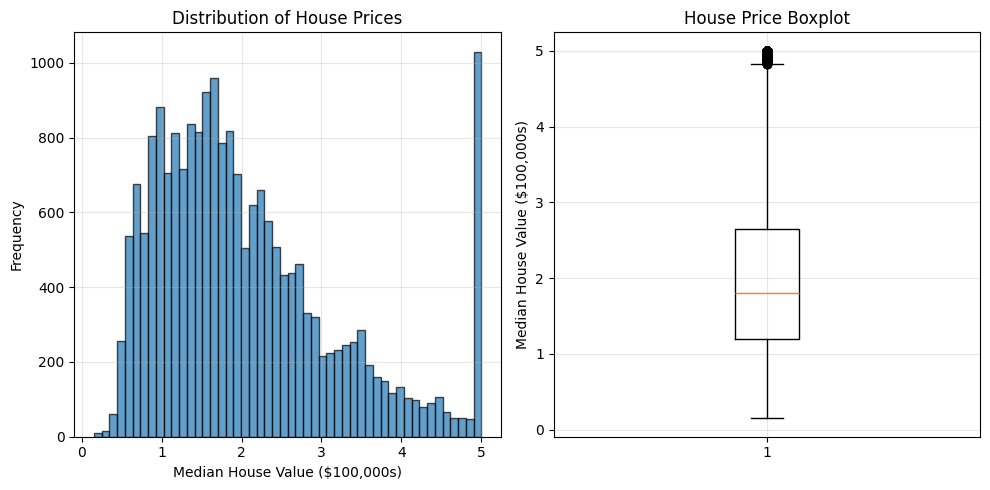

Notice: Prices are capped at $500,000 (value of 5.0)


In [44]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('Median House Value ($100,000s)')
plt.title('House Price Boxplot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: Prices are capped at $500,000 (value of 5.0)")

### Feature Correlations

Which features have the strongest relationship with house prices?

In [45]:
print("\nCorrelations with House Price (sorted by strength):")
print("=" * 60)

correlations = df.corr()['MedHouseVal'].sort_values(ascending=False).drop('MedHouseVal')

for feature, corr in correlations.items():
    bar = '█' * int(abs(corr) * 40)
    sign = '+' if corr > 0 else '-'
    print(f"{feature:12s}: {sign}{bar} {corr:6.3f}")

print("\nKey insight: Median income has the strongest correlation!")


Correlations with House Price (sorted by strength):
MedInc      : +███████████████████████████  0.688
AveRooms    : +██████  0.152
HouseAge    : +████  0.106
AveOccup    : - -0.024
Population  : - -0.025
Longitude   : -█ -0.046
AveBedrms   : -█ -0.047
Latitude    : -█████ -0.144

Key insight: Median income has the strongest correlation!


## 3. Split Data into Training and Testing Sets

### Why Split?

This is **the most fundamental principle** in machine learning:

1. **Training Set** (80%): Used to teach the model
2. **Test Set** (20%): Used to evaluate the model on unseen data

**Critical Rule**: The model must NEVER see the test set during training. This ensures our evaluation reflects real-world performance on new, unseen data.

### The Danger of Not Splitting

If we train and evaluate on the same data:
- The model might just memorize the training data (**overfitting**)
- We'd have no idea how it performs on new data
- It's like studying for an exam with the exact questions that will appear

In [46]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducibility
)

print("Data Split Summary:")
print("=" * 60)
print(f"Total observations:     {len(X):,}")
print(f"Training observations:  {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test observations:      {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nFeature shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test:  {X_test.shape}")

print(f"\nTarget distributions are similar:")
print(f"  Train mean: ${y_train.mean()*100000:,.0f}")
print(f"  Test mean:  ${y_test.mean()*100000:,.0f}")
print("\n✓ Good split! Distributions match.")

Data Split Summary:
Total observations:     20,640
Training observations:  16,512 (80.0%)
Test observations:      4,128 (20.0%)

Feature shapes:
  X_train: (16512, 8)
  X_test:  (4128, 8)

Target distributions are similar:
  Train mean: $207,195
  Test mean:  $205,500

✓ Good split! Distributions match.


## 4. Preprocess: Feature Scaling

### Why Scale Features?

Linear Regression uses **gradient descent** optimization, which is sensitive to feature scales. Consider:
- `MedInc`: ranges 0-15
- `Population`: ranges 3-35,000

Without scaling, features with larger ranges dominate the learning process.

### StandardScaler: The Solution

`StandardScaler` transforms each feature to have:
- **Mean = 0**
- **Standard deviation = 1**

Formula: $z = \frac{x - \mu}{\sigma}$

where:
- $x$ = original value
- $\mu$ = mean (from training data)
- $\sigma$ = standard deviation (from training data)

### Step 1: Create and Fit the Scaler

We create a scaler and **fit it on training data only**. This calculates the mean and standard deviation for each feature.

In [47]:
# Create the scaler
scaler = StandardScaler()

# Fit on training data (learns mean and std)
scaler.fit(X_train)

print("Scaler fitted on training data!")
print("\nLearned parameters (first 3 features):")
for i in range(3):
    feature = housing_data.feature_names[i]
    mean = scaler.mean_[i]
    std = scaler.scale_[i]
    print(f"  {feature:10s}: mean = {mean:6.2f}, std = {std:5.2f}")

Scaler fitted on training data!

Learned parameters (first 3 features):
  MedInc    : mean =   3.88, std =  1.90
  HouseAge  : mean =  28.61, std = 12.60
  AveRooms  : mean =   5.44, std =  2.39


### Step 2: Transform Training Data

Now we apply the scaling transformation to the training data.

In [48]:
# Transform training data
X_train_scaled = scaler.transform(X_train)

print("Training data scaled!")
print(f"Shape: {X_train_scaled.shape}")
print(f"\nAfter scaling, each feature has:")
print(f"  Mean ≈ 0.0: {X_train_scaled.mean():.6f}")
print(f"  Std ≈ 1.0:  {X_train_scaled.std():.6f}")

Training data scaled!
Shape: (16512, 8)

After scaling, each feature has:
  Mean ≈ 0.0: 0.000000
  Std ≈ 1.0:  1.000000


### Step 3: Transform Test Data (CRITICAL!)

**Critical Rule**: We must use the **same** mean and std (from training data) to transform the test set.

**Why?**
- In production, new data arrives with no labels
- We can't compute statistics from unlabeled data
- We must use the training statistics we already learned

**What NOT to do**: Never call `scaler.fit(X_test)` — this would leak test information!

In [49]:
# Transform test data using training statistics
X_test_scaled = scaler.transform(X_test)  # Note: transform only, NOT fit_transform!

print("Test data scaled using training statistics!")
print(f"Shape: {X_test_scaled.shape}")
print("\n⚠ Important: We used training mean/std, not test mean/std")
print("   This prevents data leakage and simulates real deployment.")

Test data scaled using training statistics!
Shape: (4128, 8)

⚠ Important: We used training mean/std, not test mean/std
   This prevents data leakage and simulates real deployment.


## 5. Train the Linear Regression Model

### How Linear Regression Works

Linear Regression finds the best-fitting hyperplane through the data:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

where:
- $\hat{y}$ = predicted house value
- $\beta_0$ = intercept (baseline value)
- $\beta_1, ..., \beta_n$ = coefficients (feature weights)
- $x_1, ..., x_n$ = feature values (scaled)

The algorithm minimizes the **sum of squared errors** between predictions and actual values.

In [50]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"\nModel learned {len(model.coef_)} coefficients (one per feature)")
print(f"Intercept: {model.intercept_:.4f}")


Model learned 8 coefficients (one per feature)
Intercept: 2.0719


### Interpreting Model Coefficients

Each coefficient shows how much the target changes when that feature increases by one standard deviation (since we scaled).

In [51]:
print("Feature Importance (Coefficients):")
print("=" * 60)

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': housing_data.feature_names,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coef_df.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    sign = '+' if coef > 0 else '-'
    bar = '█' * int(abs(coef) * 10)
    print(f"{feature:12s}: {sign}{bar} {coef:7.4f}")

print("\nInterpretation: Median income has the strongest positive impact!")

Feature Importance (Coefficients):
Latitude    : -████████ -0.8969
Longitude   : -████████ -0.8698
MedInc      : +████████  0.8544
AveBedrms   : +███  0.3393
AveRooms    : -██ -0.2944
HouseAge    : +█  0.1225
AveOccup    : - -0.0408
Population  : - -0.0023

Interpretation: Median income has the strongest positive impact!


## 6. Make Predictions

Now we can use our trained model to predict house prices on the test set.

In [52]:
y_test_pred = model.predict(X_test_scaled)

print(f"Generated {len(y_test_pred):,} predictions on test set")

# Show some sample predictions
print("\nSample Predictions (first 5 test observations):")

sample_df = pd.DataFrame({
    'Actual': y_test.iloc[:5].values * 100000,
    'Predicted': y_test_pred[:5] * 100000,
    'Error': (y_test.iloc[:5].values - y_test_pred[:5]) * 100000
})

# Format as currency
sample_df['Actual'] = sample_df['Actual'].apply(lambda x: f"${x:,.0f}")
sample_df['Predicted'] = sample_df['Predicted'].apply(lambda x: f"${x:,.0f}")
sample_df['Error'] = sample_df['Error'].apply(lambda x: f"${x:,.0f}")

sample_df

Generated 4,128 predictions on test set

Sample Predictions (first 5 test observations):


,Actual,Predicted,Error
0,"$47,700","$71,912","$-24,212"
1,"$45,800","$176,402","$-130,602"
2,"$500,001","$270,966","$229,035"
3,"$218,600","$283,893","$-65,293"
4,"$278,000","$260,466","$17,534"


## 7. Evaluate Model Performance

### Regression Metrics

We'll use three standard metrics to evaluate our model:

1. **Mean Absolute Error (MAE)**: Average prediction error
   - Formula: $\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
   - Interpretation: Average error in dollars

2. **Root Mean Squared Error (RMSE)**: Emphasizes larger errors
   - Formula: $\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$
   - Interpretation: Typical error magnitude

3. **R² Score**: Proportion of variance explained
   - Formula: $R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$
   - Range: $(-\infty, 1]$ where 1.0 is perfect
   - Interpretation: How well the model explains the data

In [58]:
# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create performance metrics DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Root Mean Squared Error', 'R² Score'],
    'Training': [
        f"${train_mae*100000:,.0f}",
        f"${train_rmse*100000:,.0f}",
        f"{train_r2:.4f}"
    ],
    'Test': [
        f"${test_mae*100000:,.0f}",
        f"${test_rmse*100000:,.0f}",
        f"{test_r2:.4f}"
    ]
})

print("Model Performance Metrics:")
display(metrics_df)

print(f"\nInterpretation:")
print(f"  • On average, predictions are off by ${test_mae*100000:,.0f}")
print(f"  • The model explains {test_r2*100:.2f}% of variance in house prices")
print(f"  • Training and test metrics are similar → good generalization!")

Model Performance Metrics:


,Metric,Training,Test
0,Mean Absolute Error,"$52,863","$53,320"
1,Root Mean Squared Error,"$71,968","$74,558"
2,R² Score,0.6126,0.5758



Interpretation:
  • On average, predictions are off by $53,320
  • The model explains 57.58% of variance in house prices
  • Training and test metrics are similar → good generalization!


### Understanding Overfitting

**Overfitting** occurs when a model performs much better on training data than test data.

Signs of overfitting:
- Large gap between training and test R²
- Training error << Test error

Our Linear Regression shows **good generalization** because training and test metrics are similar.

In [54]:
# Check for overfitting
r2_gap = train_r2 - test_r2

print("Overfitting Analysis:")
print("=" * 60)
print(f"Training R²:  {train_r2:.4f}")
print(f"Test R²:      {test_r2:.4f}")
print(f"Gap:          {r2_gap:.4f}")

if r2_gap < 0.02:
    print("\n✓ Excellent! No overfitting detected.")
elif r2_gap < 0.05:
    print("\n✓ Good! Minimal overfitting.")
elif r2_gap < 0.10:
    print("\n⚠ Slight overfitting present.")
else:
    print("\n✗ Significant overfitting detected!")

Overfitting Analysis:
Training R²:  0.6126
Test R²:      0.5758
Gap:          0.0368

✓ Good! Minimal overfitting.


## 8. Visualize Results

### Actual vs Predicted Values

This scatter plot shows how well predictions match actual values. Points on the diagonal line represent perfect predictions.

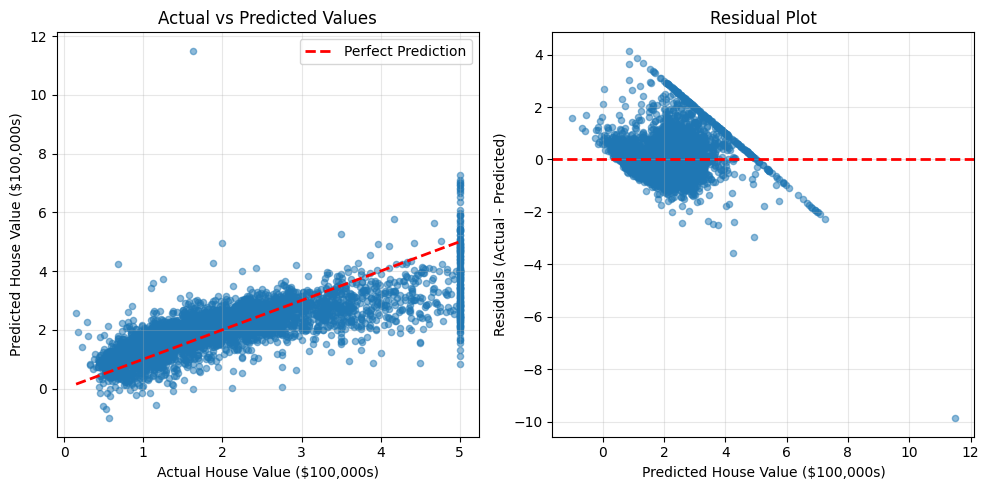


Ideal patterns:
  • Left plot: Points cluster around diagonal line
  • Right plot: Residuals randomly scattered around zero


In [55]:
plt.figure(figsize=(10, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual House Value ($100,000s)')
plt.ylabel('Predicted House Value ($100,000s)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted House Value ($100,000s)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nIdeal patterns:")
print("  • Left plot: Points cluster around diagonal line")
print("  • Right plot: Residuals randomly scattered around zero")

### Error Distribution

Let's examine how prediction errors are distributed.

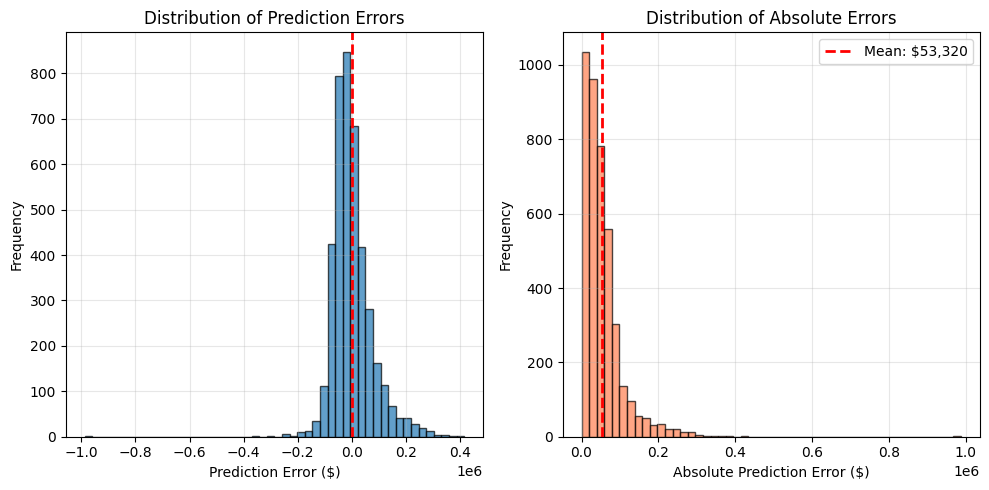


Error Statistics:
  Mean error: $348 (should be near $0)
  Mean absolute error: $53,320
  Most predictions within: ±$60,011 (68th percentile)


In [56]:
plt.figure(figsize=(10, 5))

# Error distribution
plt.subplot(1, 2, 1)
errors = (y_test - y_test_pred) * 100000
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

# Absolute errors
plt.subplot(1, 2, 2)
abs_errors = np.abs(errors)
plt.hist(abs_errors, bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Absolute Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Errors')
plt.axvline(x=abs_errors.mean(), color='r', linestyle='--', lw=2, 
            label=f'Mean: ${abs_errors.mean():,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nError Statistics:")
print(f"  Mean error: ${errors.mean():,.0f} (should be near $0)")
print(f"  Mean absolute error: ${abs_errors.mean():,.0f}")
print(f"  Most predictions within: ±${abs_errors.quantile(0.68):,.0f} (68th percentile)")

## 9. Key Takeaways

### What We Learned

1. **The ML Workflow**: Load → Split → Scale → Train → Evaluate → Analyze

2. **Always Split Data First**: Never train and evaluate on the same data

3. **Feature Scaling Matters**: Linear Regression needs scaled features for optimal performance

4. **Prevent Data Leakage**: Use training statistics (mean/std) to transform test data

5. **Multiple Metrics**: MAE, RMSE, and R² provide different perspectives on performance

6. **Generalization is Key**: Similar train/test performance indicates good generalization

7. **Visualize Results**: Plots reveal patterns that metrics alone might miss

### Linear Regression Strengths

✓ **Simple and interpretable**: Coefficients show feature importance  
✓ **Fast to train**: No complex iterations  
✓ **Good baseline**: Other models should beat this performance  
✓ **Reliable**: Consistent results, no randomness  

### Linear Regression Limitations

✗ **Assumes linearity**: Can't capture complex non-linear relationships  
✗ **Sensitive to outliers**: Squared error heavily penalizes large deviations  
✗ **No feature interactions**: Treats features independently  

### What's Next?

This notebook taught the **fundamental workflow**. The next notebook will introduce:

1. **Pipelines**: Automate preprocessing + training in one object
2. **Multiple Algorithms**: Compare Linear Regression with tree-based models
3. **Proper Validation**: Use validation sets to avoid data leakage when comparing algorithms
4. **Cross-Validation**: More robust performance estimation

### Best Practices Checklist

✓ Always split data before any preprocessing  
✓ Fit scaler/preprocessor only on training data  
✓ Use same preprocessing for train and test  
✓ Evaluate with multiple metrics  
✓ Check for overfitting (train vs test gap)  
✓ Visualize predictions and residuals  
✓ Set random_state for reproducibility  
✓ Document your process clearly  